In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload


import warnings
warnings.filterwarnings("ignore")

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy
from cgi_phasec_poppy.math_module import xp
from cgi_phasec_poppy.imshows import *

iwa = 6
owa = 20

data_dir = cgi_phasec_poppy.data_dir

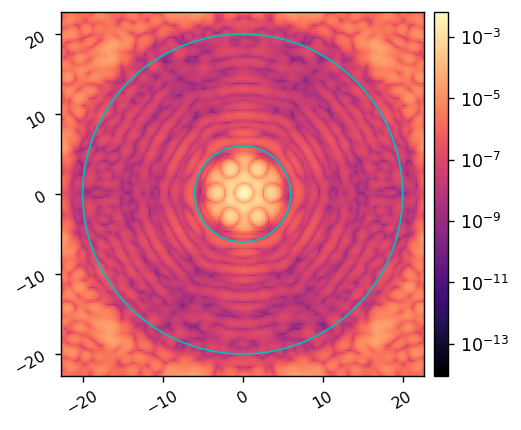

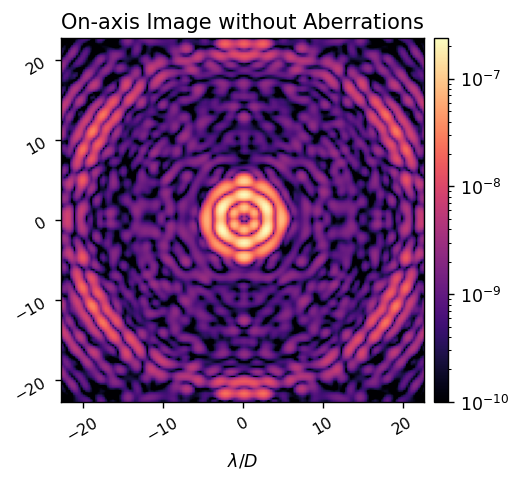

In [2]:
mode = cgi_phasec_poppy.cgi.CGI(cgi_mode='spc-wide', npsf=150)

mode.use_opds = False
mode.use_pupil_defocus = False

mode.use_fpm = False
ref_unocc_im = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(ref_unocc_im, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

mode.Imax_ref = ref_unocc_im.max()
mode.use_fpm = True

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(image, 'On-axis Image without Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')

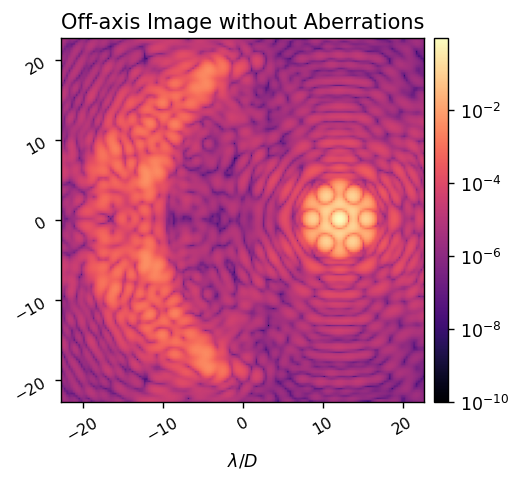

In [3]:
mode.source_offset = (12,0)
off_ax_im = mode.snap()

imshow1(off_ax_im, 'Off-axis Image without Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')


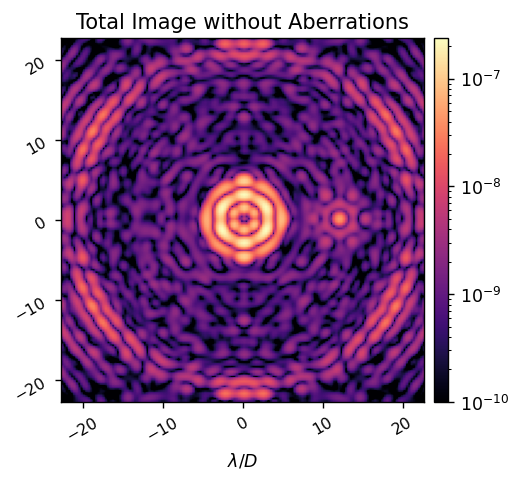

In [4]:
tot_im = image + 5e-8*off_ax_im
imshow1(tot_im, 'Total Image without Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')

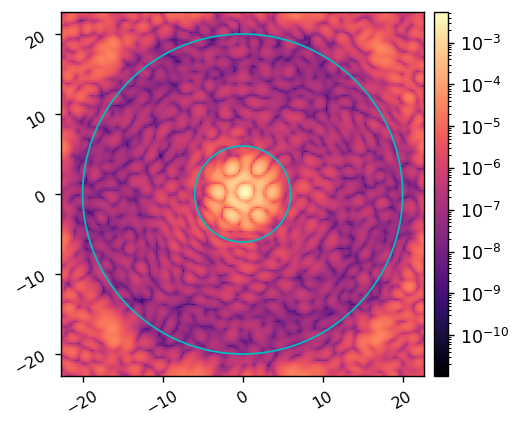

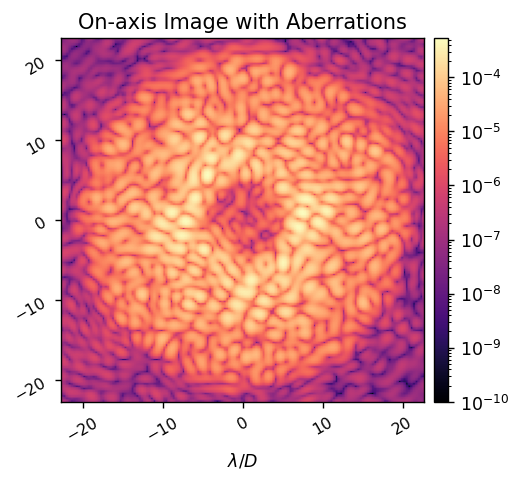

In [2]:
reload(cgi_phasec_poppy.cgi)
mode = cgi_phasec_poppy.cgi.CGI(cgi_mode='spc-wide', 
               npsf=150,
               use_pupil_defocus=True, 
               use_opds=True,
            #    source_flux=3.840e+08*u.ph/(u.s * u.m**2),
               )

# mode.set_dm1(dm1_best)
# mode.set_dm2(dm2_best)

mode.use_fpm = False
ref_unocc_im = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(ref_unocc_im, lognorm=True, pxscl=mode.psf_pixelscale_lamD, patches=patches)

mode.Imax_ref = ref_unocc_im.max()
mode.use_fpm = True

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(image, 'On-axis Image with Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')
# if poppy.accel_math._USE_CUPY:
#     misc.save_fits(data_dir/'spc-wide_psf_gpu.fits', psf, header={'PIXELSCL':mode.psf_pixelscale_lamD})
# else:
#     misc.save_fits(data_dir/'spc-wide_psf_cpu.fits', psf, header={'PIXELSCL':mode.psf_pixelscale_lamD})

In [5]:

dm1_flat = fits.getdata(cgi_phasec_poppy.data_dir/'dm-acts'/'flatmaps'/'spc_wide_band4_flattened_dm1.fits')
dm2_flat = fits.getdata(cgi_phasec_poppy.data_dir/'dm-acts'/'flatmaps'/'spc_wide_band4_flattened_dm2.fits')


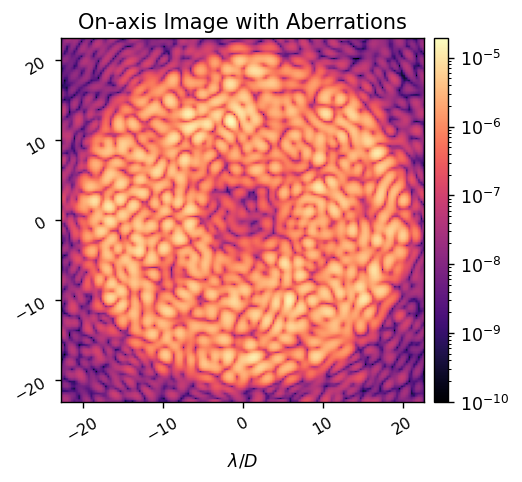

In [7]:
mode.set_dm1(dm1_flat)
mode.set_dm2(dm2_flat)

image = mode.snap()

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
imshow1(image, 'On-axis Image with Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')

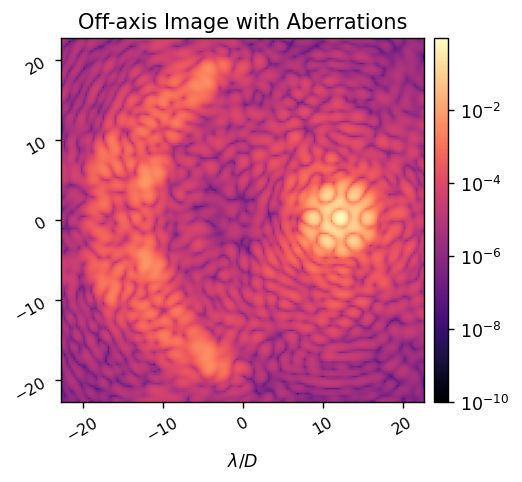

In [7]:
mode.source_offset = (12,0)
off_ax_im = mode.snap()

imshow1(off_ax_im, 'Off-axis Image with Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')

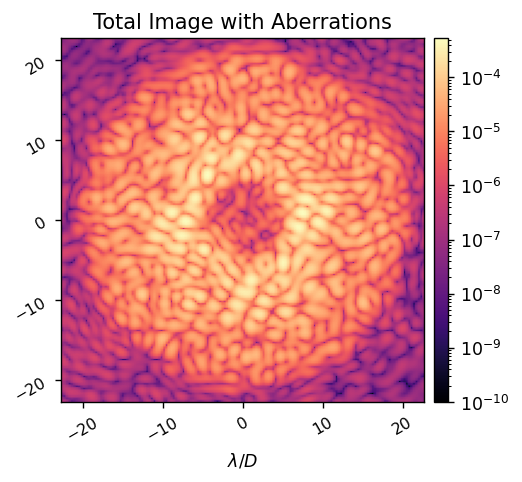

In [7]:
tot_im = image + 5e-8*off_ax_im
imshow1(tot_im, 'Total Image with Aberrations', lognorm=True, vmin=1e-10,
        pxscl=mode.psf_pixelscale_lamD, xlabel='$\lambda/D$')